In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/covid19-global-forecasting-week-4/train.csv')
test_data = pd.read_csv('data/covid19-global-forecasting-week-4/test.csv')

In [3]:
train_data["Date"] = pd.to_datetime(train_data["Date"])

In [4]:
train_data

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
33799,35672,NaN,Zimbabwe,2020-05-04,34.0,4.0
33800,35673,NaN,Zimbabwe,2020-05-05,34.0,4.0
33801,35674,NaN,Zimbabwe,2020-05-06,34.0,4.0
33802,35675,NaN,Zimbabwe,2020-05-07,34.0,4.0


In [5]:
test_data

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06
...,...,...,...,...
13454,13455,NaN,Zimbabwe,2020-05-10
13455,13456,NaN,Zimbabwe,2020-05-11
13456,13457,NaN,Zimbabwe,2020-05-12
13457,13458,NaN,Zimbabwe,2020-05-13


In [6]:
Brazil = train_data[train_data.Country_Region == 'Brazil']
France = train_data[train_data.Country_Region == 'France']
Germany = train_data[train_data.Country_Region == 'Germany']
Iran = train_data[train_data.Country_Region == 'Iran']
Italy = train_data[train_data.Country_Region == 'Italy']
Russia = train_data[train_data.Country_Region == 'Russia']
Spain = train_data[train_data.Country_Region == 'Spain']
Turkey = train_data[train_data.Country_Region == 'Turkey']
US = train_data[train_data.Country_Region == 'US']
UK = train_data[train_data.Country_Region == 'United Kingdom']


Brazil_test = test_data[test_data.Country_Region == 'Brazil']
France_test = test_data[test_data.Country_Region == 'France']
Germany_test = test_data[test_data.Country_Region == 'Germany']
Iran_test = test_data[test_data.Country_Region == 'Iran']
Italy_test = test_data[test_data.Country_Region == 'Italy']
Russia_test = test_data[test_data.Country_Region == 'Russia']
Spain_test = test_data[test_data.Country_Region == 'Spain']
Turkey_test = test_data[test_data.Country_Region == 'Turkey']
US_test = test_data[test_data.Country_Region == 'US']
UK_test = test_data[test_data.Country_Region == 'United Kingdom']


US = US.groupby("Date").agg({'ConfirmedCases': 'sum','Fatalities':'sum'})
UK = UK.groupby("Date").agg({'ConfirmedCases': 'sum','Fatalities':'sum'})
France = France.groupby("Date").agg({'ConfirmedCases': 'sum','Fatalities':'sum'})


US_test = US_test.groupby("Date")
UK_test = UK_test.groupby("Date")
France_test = France_test.groupby("Date")



Countries = [Brazil, France, Germany, Iran, Italy, Russia, Spain, Turkey, US, UK]
Countries_test = [Brazil_test, France_test, Germany_test, Iran_test, Italy_test, Russia_test, Spain_test, Turkey_test, US_test, UK_test]
Countries_str = ["Brazil", "France", "Germany", "Iran", "Italy", "Russia", "Spain", "Turkey", "US", "UK"]


for df,df_test in zip(Countries,Countries_test):
    try:
        del df["Id"]
        del df["Province_State"]
        del df["Country_Region"]
        df.index = df["Date"]
        del df["Date"]
        del df_test["Id"]
        del df_test["Province_State"]
        del df_test["Country_Region"]
        df.index = df["Date"]
        del df_test["Date"]
    except:
        print("deleted....")
    df["Days"] = df.index - df.index.min()

    
    
     

deleted....
deleted....
deleted....
deleted....
deleted....
deleted....
deleted....
deleted....
deleted....
deleted....


In [7]:
Turkey

,ConfirmedCases,Fatalities,Days
Date,,,
2020-01-22,0.0,0.0,0 days
2020-01-23,0.0,0.0,1 days
2020-01-24,0.0,0.0,2 days
2020-01-25,0.0,0.0,3 days
2020-01-26,0.0,0.0,4 days
...,...,...,...
2020-05-04,127659.0,3461.0,103 days
2020-05-05,129491.0,3520.0,104 days
2020-05-06,131744.0,3584.0,105 days


In [8]:
train_countries = []
validation_countries = []
predicted_countries = []

In [9]:
turkey_train = Turkey.iloc[:int(Turkey.shape[0]*0.95)]
turkey_validation = Turkey.iloc[int(Turkey.shape[0]*0.95):]
turkey_log_series = np.log(Turkey["ConfirmedCases"])
turkey_predicted = turkey_validation.copy()

#replace -inf with 0 
turkey_log_series = turkey_log_series.replace(turkey_log_series[0],0)

In [10]:
turkey_model = ARIMA(turkey_log_series,(2,2,2))
turkey_fit = turkey_model.fit()

/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [11]:
prediction_arima = turkey_fit.forecast(len(turkey_validation))[0]
future_predicted = turkey_fit.forecast(len(Turkey_test))[0]

turkey_predicted["ARIMA Model Prediction"] = list(np.exp(prediction_arima))
Turkey_test["Test"] = list(np.exp(future_predicted))

In [12]:
print("Root Mean Square Error for ARIMA Model: ", np.sqrt(mean_squared_error(list(turkey_predicted["ConfirmedCases"]),np.exp(prediction_arima))))

Root Mean Square Error for ARIMA Model:  13303.777961914719


Text(0.5, 1.0, 'Confirmed Cases ARIMA Model Forecasting')

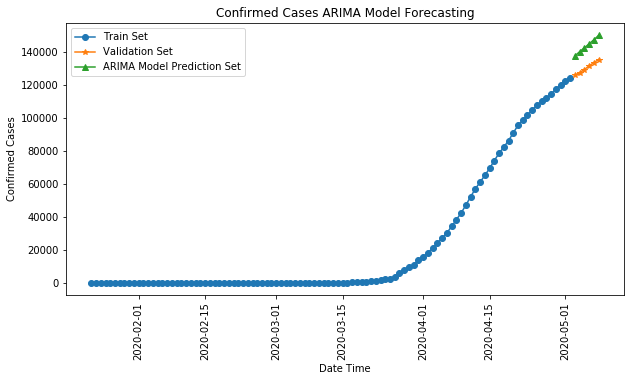

In [13]:
plt.figure(figsize=(10,5))
plt.plot(turkey_train.index, turkey_train["ConfirmedCases"], label="Train Set", marker='o')
plt.plot(turkey_validation.index, turkey_validation["ConfirmedCases"], label="Validation Set",marker='*')
plt.plot(turkey_predicted["ARIMA Model Prediction"], label="ARIMA Model Prediction Set",marker='^')
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.title("Confirmed Cases ARIMA Model Forecasting")


In [14]:
for country in Countries:
    train = country.iloc[:int(country.shape[0]*0.95)]
    validation = country.iloc[int(country.shape[0]*0.95):]
    log_series = np.log(country["ConfirmedCases"])
    predicted = validation.copy()

    log_series = log_series.replace(log_series[0],0)
    
    model = ARIMA(log_series,(2,2,2))
    try:
        fit = model.fit()
    except:
        model = ARIMA(log_series,(1,1,1))
        fit = model.fit()
    
    prediction_arima = fit.forecast(len(validation))[0]
    predicted["ARIMA Model Prediction"] = list(np.exp(prediction_arima))
    
    train_countries.append(train)
    validation_countries.append(validation)
    predicted_countries.append(predicted)
    
    print("Root Mean Square Error for ARIMA Model: ", np.sqrt(mean_squared_error(list(predicted["ConfirmedCases"]),np.exp(prediction_arima))))
    

/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Root Mean Square Error for ARIMA Model:  71136.20534402203
Root Mean Square Error for ARIMA Model:  4962.090444303637


/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Root Mean Square Error for ARIMA Model:  5448.479995171113


/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Root Mean Square Error for ARIMA Model:  12930.870639892406


/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Root Mean Square Error for ARIMA Model:  18340.068148020655
Root Mean Square Error for ARIMA Model:  92698.64649309045


/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequenc

Root Mean Square Error for ARIMA Model:  7416.96362516366


/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Root Mean Square Error for ARIMA Model:  13303.777961914719


/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/didemyaniktepe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency

Root Mean Square Error for ARIMA Model:  1156404.2062002611
Root Mean Square Error for ARIMA Model:  34029.01682547707


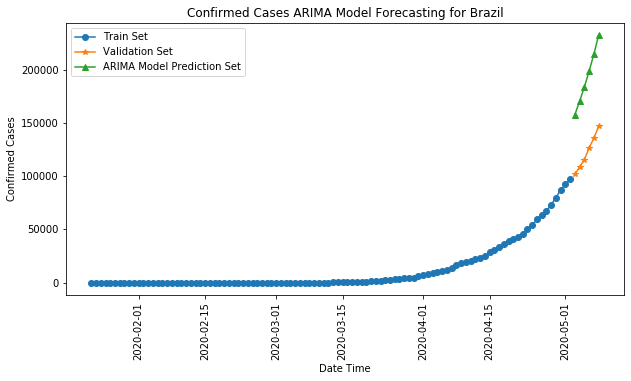

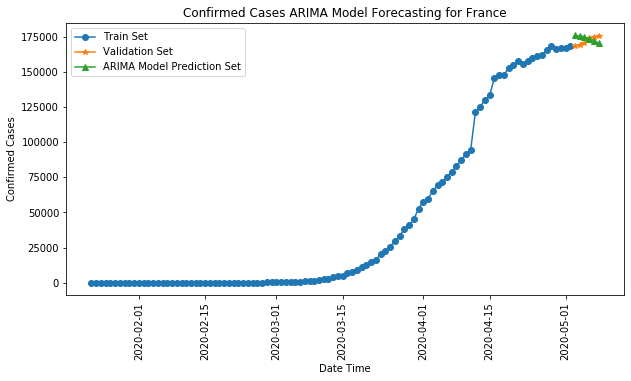

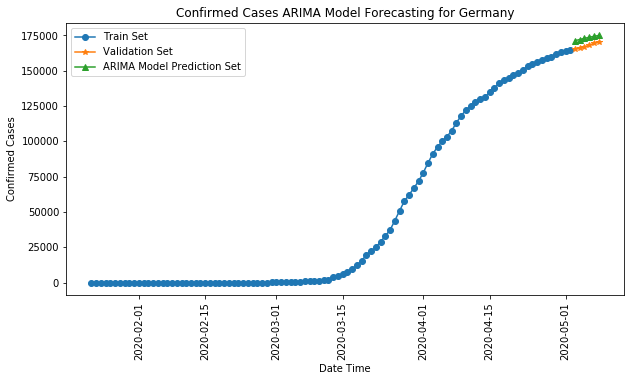

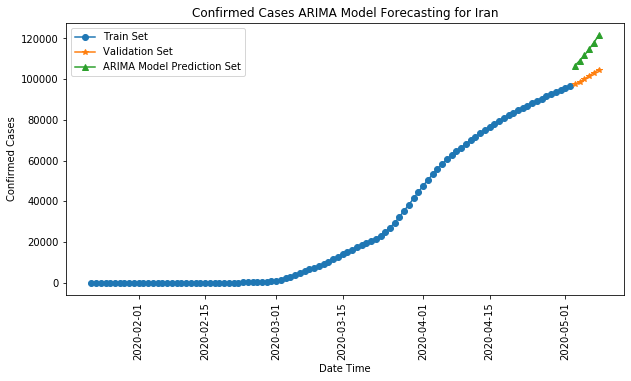

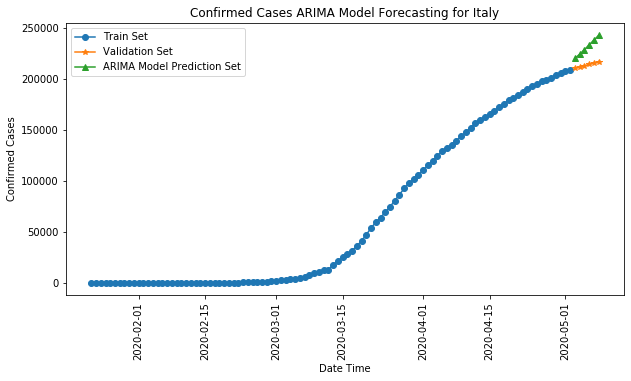

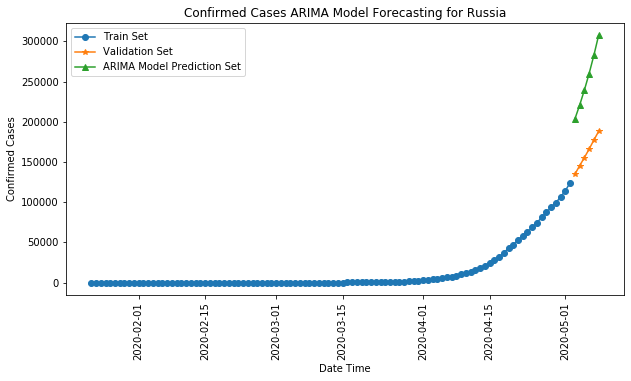

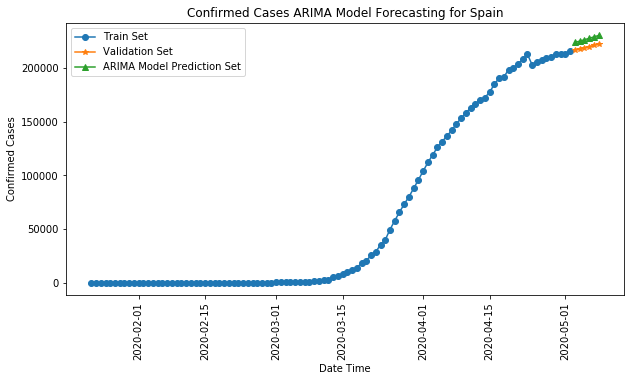

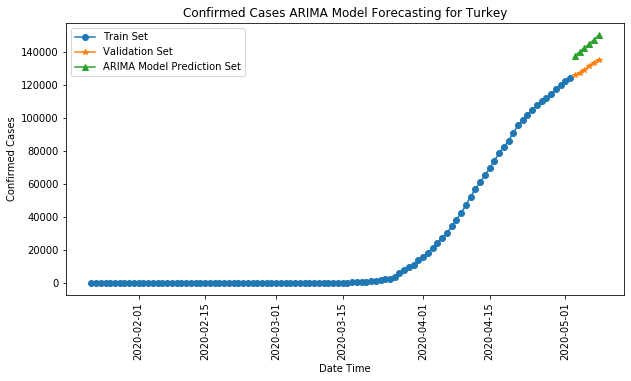

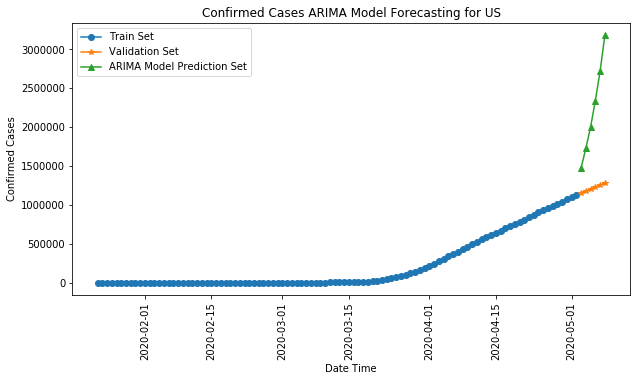

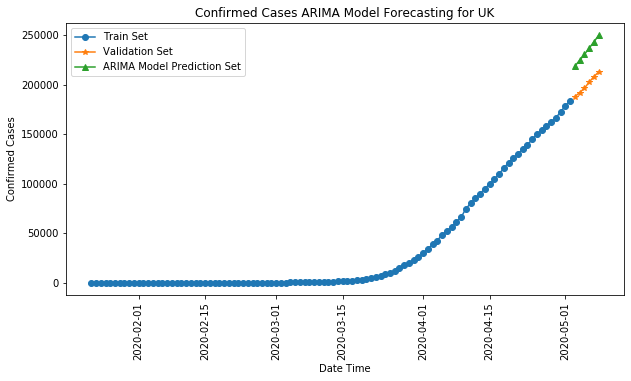

In [17]:
for i in range(10):    
    plt.figure(figsize=(10,5))
    plt.plot(train_countries[i].index ,train_countries[i]["ConfirmedCases"] ,label="Train Set",marker='o')
    plt.plot(validation_countries[i].index, validation_countries[i]["ConfirmedCases"], label="Validation Set", marker='*')
    plt.plot(predicted_countries[i]["ARIMA Model Prediction"], label="ARIMA Model Prediction Set", marker='^')
    plt.legend()
    plt.xlabel("Date Time")
    plt.ylabel('Confirmed Cases')
    title ="Confirmed Cases ARIMA Model Forecasting for " + Countries_str[i]
    plt.title(title)
    plt.xticks(rotation=90)